In [2]:
# import pandas as pd
# from google.colab import files
# uploaded = files.upload()


In [3]:
# data = pd.read_csv('/content/weatherAUS.csv - weatherAUS.csv')
import pandas as pd
data = pd.read_csv('D:\\7th Semester\\PRIEE\\GITHUB-REPO\\Data_Collection\\weatherAUS.csv - weatherAUS.csv')
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,01-12-2008,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,02-12-2008,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,03-12-2008,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,04-12-2008,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,05-12-2008,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [4]:
data.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [5]:
data['RainToday'].replace({'No': 0, 'Yes': 1},inplace = True)
data['RainTomorrow'].replace({'No': 0, 'Yes': 1},inplace = True)

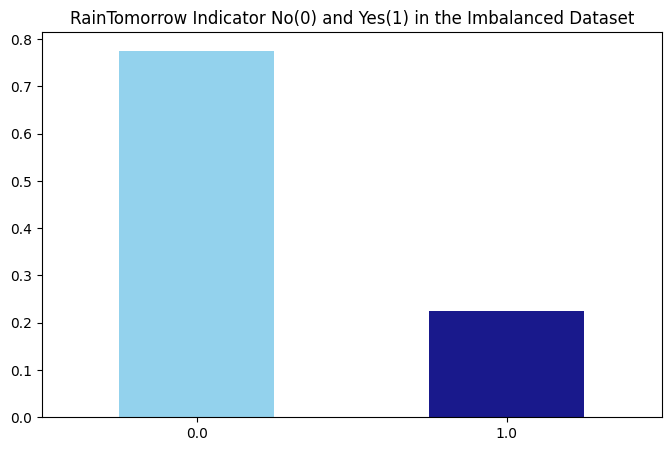

In [6]:
#Check if data is balanced or not
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
data.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) in the Imbalanced Dataset')
plt.show()

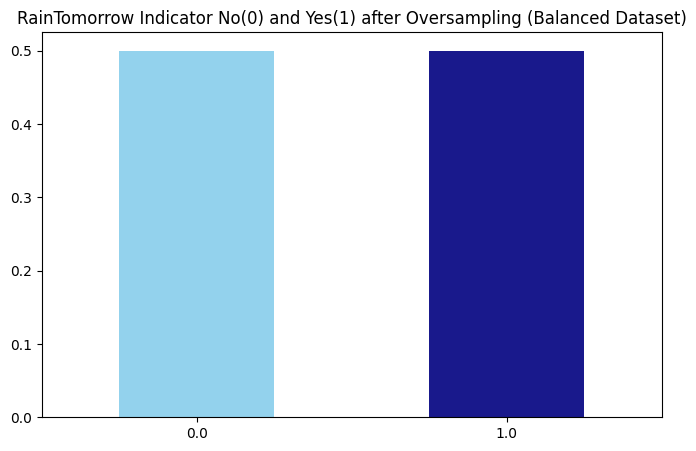

In [7]:
#Handle data with imbalance by oversampling
from sklearn.utils import resample

no = data[data.RainTomorrow == 0]
yes = data[data.RainTomorrow == 1]
yes_oversampled = resample(yes, replace=True, n_samples=len(no), random_state=123)
oversampled = pd.concat([no, yes_oversampled])

fig = plt.figure(figsize = (8,5))
oversampled.RainTomorrow.value_counts(normalize = True).plot(kind='bar', color= ['skyblue','navy'], alpha = 0.9, rot=0)
plt.title('RainTomorrow Indicator No(0) and Yes(1) after Oversampling (Balanced Dataset)')
plt.show()

In [8]:
#Looking for null values
oversampled.isna().sum()

Date                  0
Location              0
MinTemp            1082
MaxTemp             471
Rainfall           3124
Evaporation       95411
Sunshine         104831
WindGustDir       15491
WindGustSpeed     15354
WindDir9am        14728
WindDir3pm         6440
WindSpeed9am       2206
WindSpeed3pm       4353
Humidity9am        3171
Humidity3pm        6031
Pressure9am       21728
Pressure3pm       21746
Cloud9am          81339
Cloud3pm          85614
Temp9am            1653
Temp3pm            4558
RainToday          3124
RainTomorrow          0
dtype: int64

In [9]:
#Handle data with missing values by imputing
oversampled.select_dtypes(include=['object']).columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'], dtype='object')

In [10]:
# Impute categorical var with Mode
oversampled['Date'] = oversampled['Date'].fillna(oversampled['Date'].mode()[0])
oversampled['Location'] = oversampled['Location'].fillna(oversampled['Location'].mode()[0])
oversampled['WindGustDir'] = oversampled['WindGustDir'].fillna(oversampled['WindGustDir'].mode()[0])
oversampled['WindDir9am'] = oversampled['WindDir9am'].fillna(oversampled['WindDir9am'].mode()[0])
oversampled['WindDir3pm'] = oversampled['WindDir3pm'].fillna(oversampled['WindDir3pm'].mode()[0])

In [11]:
# Convert categorical features to continuous features with Label Encoding
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in oversampled.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    oversampled[col] = lencoders[col].fit_transform(oversampled[col])

In [12]:
import warnings
warnings.filterwarnings("ignore")
# Multiple Imputation by Chained Equations
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
MiceImputed = oversampled.copy(deep=True) 
mice_imputer = IterativeImputer()
MiceImputed.iloc[:, :] = mice_imputer.fit_transform(oversampled)

In [13]:
# Detecting outliers with IQR
Q1 = MiceImputed.quantile(0.25)
Q3 = MiceImputed.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Date             1712.000000
Location           25.000000
MinTemp             9.300000
MaxTemp            10.200000
Rainfall            2.400000
Evaporation         4.069582
Sunshine            5.983632
WindGustDir         9.000000
WindGustSpeed      19.000000
WindDir9am          8.000000
WindDir3pm          8.000000
WindSpeed9am       13.000000
WindSpeed3pm       11.000000
Humidity9am        26.000000
Humidity3pm        30.000000
Pressure9am         8.800000
Pressure3pm         8.800000
Cloud9am            4.000000
Cloud3pm            3.691648
Temp9am             9.300000
Temp3pm             9.800000
RainToday           1.000000
RainTomorrow        1.000000
dtype: float64


In [14]:
# Removing outliers from the dataset
MiceImputed = MiceImputed[~((MiceImputed < (Q1 - 1.5 * IQR)) |(MiceImputed > (Q3 + 1.5 * IQR))).any(axis=1)]
MiceImputed.shape

(170498, 23)

FEATURE SELECTION

In [15]:
# Standardizing data
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(MiceImputed)
modified_data = pd.DataFrame(r_scaler.transform(MiceImputed), index=MiceImputed.index, columns=MiceImputed.columns)


In [16]:
# Feature Importance using Filter Method (Chi-Square)
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='RainTomorrow']
y = modified_data[['RainTomorrow']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

Index(['Rainfall', 'Sunshine', 'WindGustSpeed', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'RainToday'],
      dtype='object')


We Observe that 
>"Sunshine" 
>"Humidity9am"
>"Humidity3pm"
>"Pressure9am" and 
>"Pressure3pm" have higer importance

In [17]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = MiceImputed.drop('RainTomorrow', axis=1)
y = MiceImputed['RainTomorrow']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)


['Sunshine', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm']
[0.03094334 0.02890495 0.03301456 0.03237542 0.02132193 0.03321251
 0.13794989 0.02102881 0.04241191 0.02137696 0.0222857  0.0217154
 0.02374655 0.03459154 0.10599028 0.04846918 0.0612174  0.05629396
 0.14311787 0.03123585 0.03627315 0.01252283]


In [18]:
#Training Rainfall Prediction Model With Different Models
features = MiceImputed[['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustDir', 
                       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 
                       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 
                       'RainToday']]
target = MiceImputed['RainTomorrow']

# Split into test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.25, random_state=12345)

# Normalize Features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [19]:
#Function to plot the roc_curve
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

GENERALIZED FUNCTION TO RUN ANY MODEL

In [20]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, cohen_kappa_score, plot_confusion_matrix, roc_curve, classification_report
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train, verbose=0)
    else:
        model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    coh_kap = cohen_kappa_score(y_test, y_pred)
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Cohen's Kappa = {}".format(coh_kap))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    
    probs = model.predict_proba(X_test)  
    probs = probs[:, 1]  
    fper, tper, thresholds = roc_curve(y_test, probs) 
    plot_roc_cur(fper, tper)
    
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')
    
    return model, accuracy, roc_auc, coh_kap, time_taken

Accuracy = 0.7970205278592375
ROC Area under Curve = 0.7910325158890109
Cohen's Kappa = 0.5857475626208661
Time taken = 3.604433298110962
              precision    recall  f1-score   support

         0.0    0.80403   0.84197   0.82256     23818
         1.0    0.78714   0.74010   0.76289     18807

    accuracy                        0.79702     42625
   macro avg    0.79558   0.79103   0.79273     42625
weighted avg    0.79658   0.79702   0.79623     42625



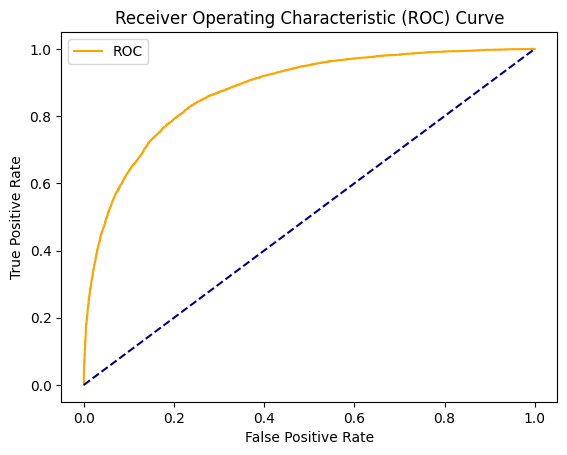

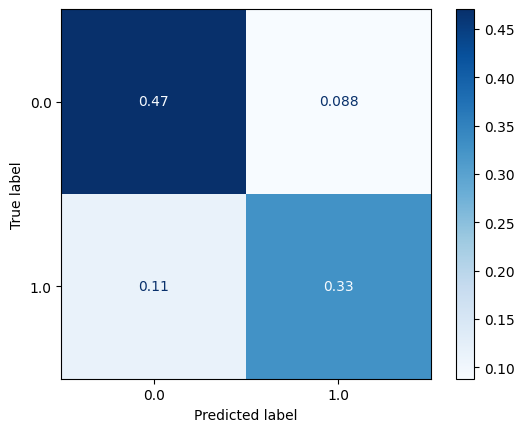

In [21]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'l1', 'solver':'liblinear'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, coh_kap_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Accuracy = 0.8692082111436951
ROC Area under Curve = 0.8703649160812612
Cohen's Kappa = 0.7363271421712376
Time taken = 0.6213700771331787
              precision    recall  f1-score   support

         0.0    0.90096   0.86053   0.88028     23818
         1.0    0.83286   0.88020   0.85588     18807

    accuracy                        0.86921     42625
   macro avg    0.86691   0.87036   0.86808     42625
weighted avg    0.87092   0.86921   0.86951     42625



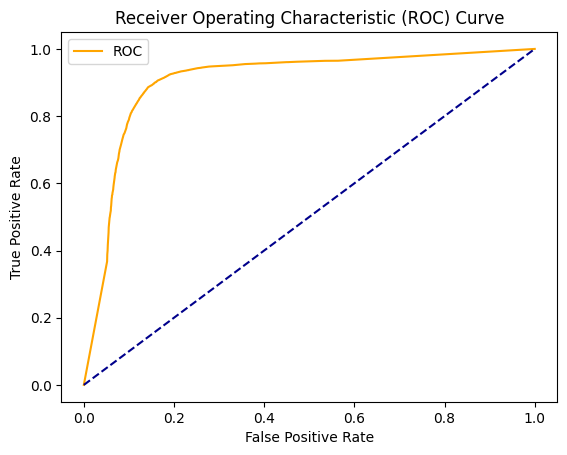

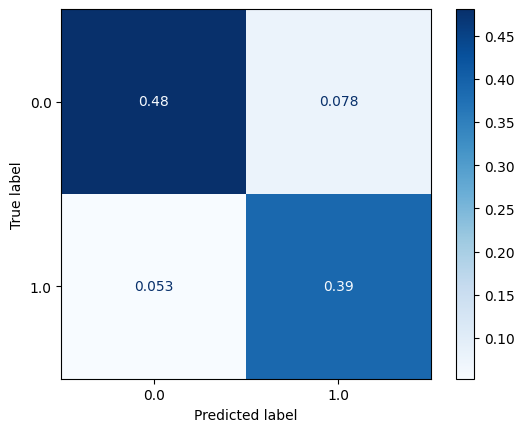

In [22]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

params_dt = {'max_depth': 16,
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, coh_kap_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Accuracy = 0.9304164222873901
ROC Area under Curve = 0.9313653755437892
Cohen's Kappa = 0.8594235145142679
Time taken = 34.00381302833557
              precision    recall  f1-score   support

         0.0    0.95076   0.92329   0.93682     23818
         1.0    0.90628   0.93944   0.92256     18807

    accuracy                        0.93042     42625
   macro avg    0.92852   0.93137   0.92969     42625
weighted avg    0.93113   0.93042   0.93053     42625



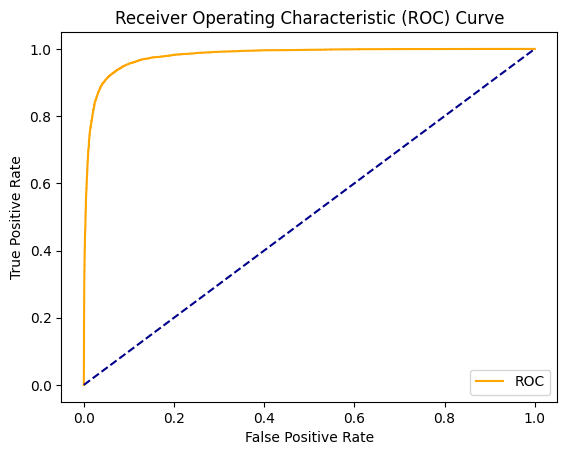

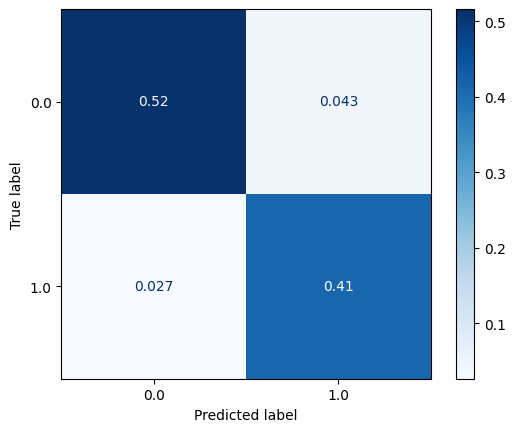

In [23]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, coh_kap_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Accuracy = 0.9580762463343109
ROC Area under Curve = 0.9602714005197145
Cohen's Kappa = 0.9154480102219862
Time taken = 300.70083379745483
              precision    recall  f1-score   support

         0.0    0.98265   0.94160   0.96169     23818
         1.0    0.92975   0.97894   0.95372     18807

    accuracy                        0.95808     42625
   macro avg    0.95620   0.96027   0.95770     42625
weighted avg    0.95931   0.95808   0.95817     42625



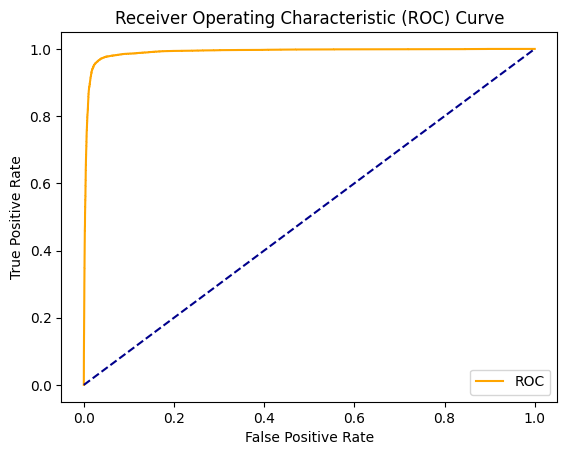

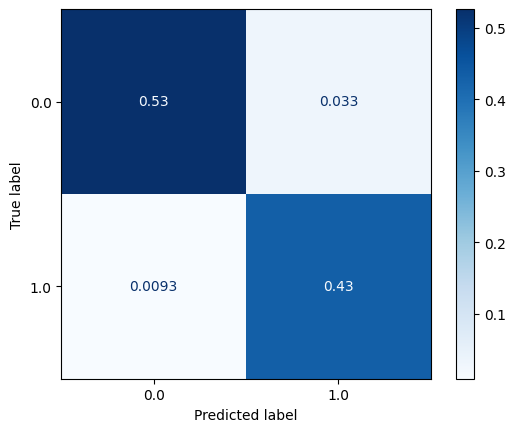

In [24]:
# XGBoost
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, coh_kap_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

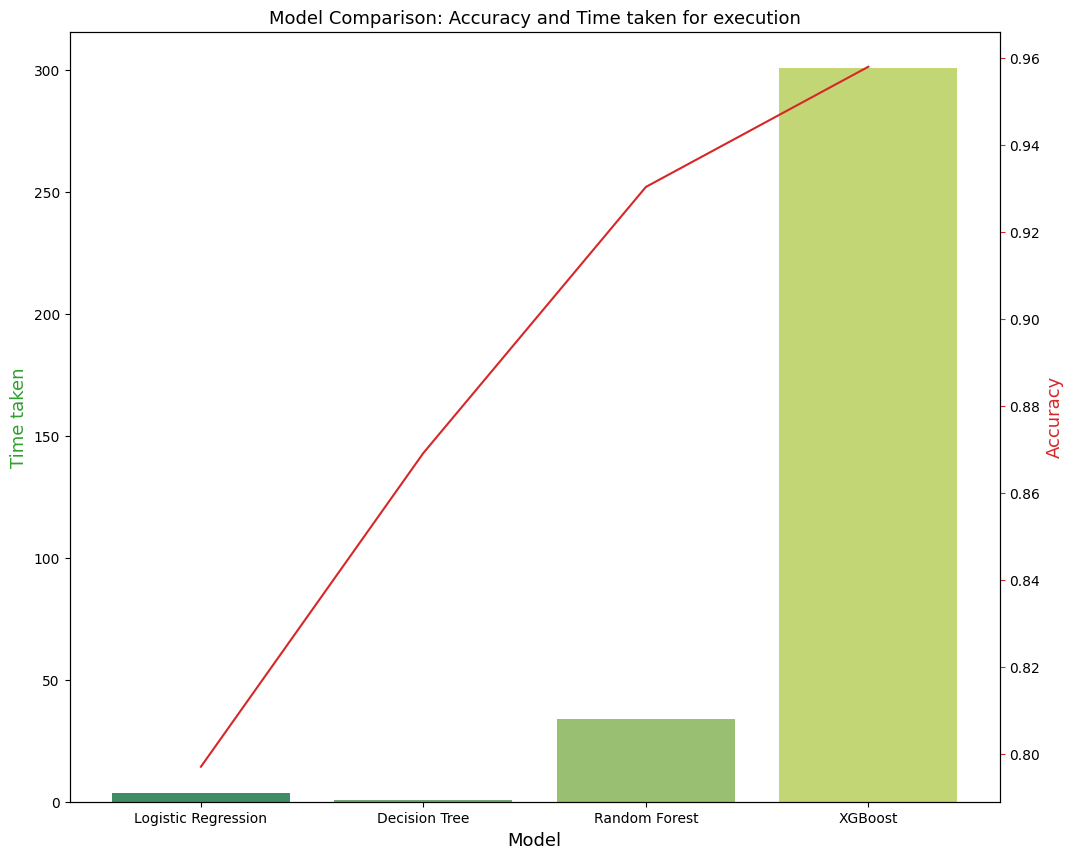

In [25]:
import seaborn as sns
accuracy_scores = [accuracy_lr, accuracy_dt, accuracy_rf, accuracy_xgb]
roc_auc_scores = [roc_auc_lr, roc_auc_dt, roc_auc_rf, roc_auc_xgb]
coh_kap_scores = [coh_kap_lr, coh_kap_dt, coh_kap_rf, coh_kap_xgb]
tt = [tt_lr, tt_dt, tt_rf, tt_xgb]

model_data = {'Model': ['Logistic Regression','Decision Tree','Random Forest','XGBoost'],
              'Accuracy': accuracy_scores,
              'ROC_AUC': roc_auc_scores,
              'Cohen_Kappa': coh_kap_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(12,10))
ax1.set_title('Model Comparison: Accuracy and Time taken for execution', fontsize=13)
color = 'tab:green'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='summer')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Accuracy', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='Accuracy', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

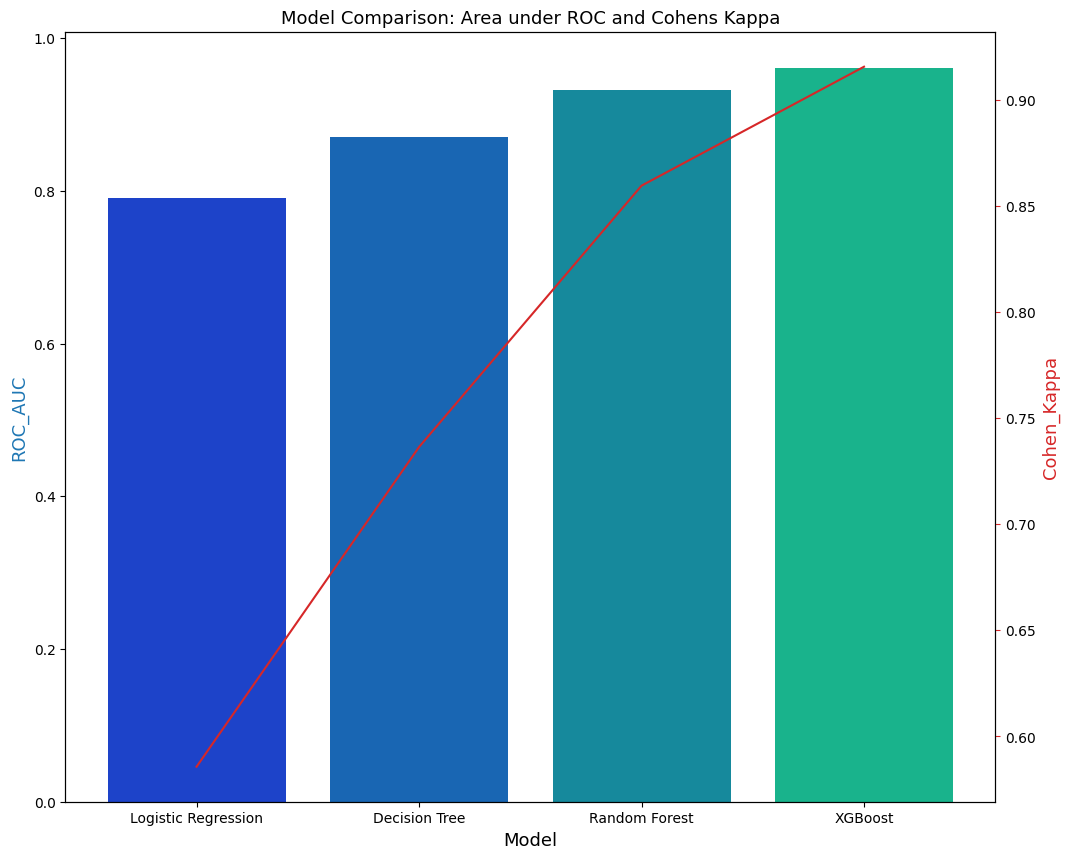

In [26]:
fig, ax3 = plt.subplots(figsize=(12,10))
ax3.set_title('Model Comparison: Area under ROC and Cohens Kappa', fontsize=13)
color = 'tab:blue'
ax3.set_xlabel('Model', fontsize=13)
ax3.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax4 = sns.barplot(x='Model', y='ROC_AUC', data = data, palette='winter')
ax3.tick_params(axis='y')
ax4 = ax3.twinx()
color = 'tab:red'
ax4.set_ylabel('Cohen_Kappa', fontsize=13, color=color)
ax4 = sns.lineplot(x='Model', y='Cohen_Kappa', data = data, sort=False, color=color)
ax4.tick_params(axis='y', color=color)
plt.show()

In [27]:
features

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2.0,13.4,22.9,0.6,5.950190,7.426974,13.0,44.0,13.0,14.0,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.872642,16.9,21.8,0.0
1,2.0,7.4,25.1,0.0,5.854481,11.410383,14.0,44.0,6.0,15.0,...,22.0,44.0,25.0,1010.6,1007.8,1.874353,2.708746,17.2,24.3,0.0
2,2.0,12.9,25.7,0.0,7.982263,12.304774,15.0,46.0,13.0,15.0,...,26.0,38.0,30.0,1007.6,1008.7,1.930208,2.000000,21.0,23.2,0.0
3,2.0,9.2,28.0,0.0,6.194695,11.707860,4.0,24.0,9.0,0.0,...,9.0,45.0,16.0,1017.6,1012.8,1.371248,2.195544,18.1,26.5,0.0
4,2.0,17.5,32.3,1.0,7.050281,5.732326,13.0,41.0,1.0,7.0,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.000000,17.8,29.7,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134889,17.0,13.6,26.3,0.0,4.082297,5.656917,7.0,30.0,3.0,7.0,...,19.0,90.0,63.0,1016.5,1013.1,5.737269,5.495855,16.6,25.2,0.0
129024,43.0,12.1,22.6,0.0,3.483305,6.147554,9.0,28.0,10.0,10.0,...,17.0,93.0,61.0,1020.6,1019.7,5.140606,5.386950,18.3,20.8,0.0
133585,17.0,1.1,11.8,0.4,-1.579266,0.598017,14.0,13.0,3.0,13.0,...,0.0,97.0,98.0,1020.1,1013.3,6.537973,7.687495,4.0,9.5,0.0
87307,8.0,24.8,31.5,0.0,5.400000,3.400000,9.0,48.0,10.0,2.0,...,28.0,63.0,60.0,1008.6,1006.2,5.000000,6.000000,28.7,30.3,0.0


In [28]:
target

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
134889    1.0
129024    1.0
133585    1.0
87307     1.0
27220     1.0
Name: RainTomorrow, Length: 170498, dtype: float64

In [29]:
#saving the scaler as pickle files
# import pickle
# pickle.dump(scaler,open('/content/scale.pkl','wb'))

In [30]:
#saving the model as pickle files
# pickle.dump(model_rf,open('/content/rainfall.pkl','wb'))

In [31]:
#saving the imputer as pickle files
# pickle.dump(mice_imputer,open('/content/imputer.pkl','wb'))

In [2]:
import pickle
import numpy as np
import random
def make_prediction(scaler_path,model_path,test_data):
  scaler_custom_loaded = pickle.load(open(scaler_path,'rb'))
  model_custom_loaded = pickle.load(open(model_path,'rb'))
  x_test_data = np.array(test_data).reshape(1,-1)
  x_test_data = scaler_custom_loaded.transform(x_test_data)
  prediction = model_custom_loaded.predict(x_test_data.reshape(1,-1))[0]
  if prediction == 1:
    print('It will Rain')
  else:
    print('It wont Rain tomorrow')

In [5]:
lencoders = pickle.load(open('D:\\7th Semester\\PRIEE\\GITHUB-REPO\\Data_Collection\\encoder.pkl','rb'))
features = pickle.load(open('D:\\7th Semester\\PRIEE\\GITHUB-REPO\\Data_Collection\\data.pkl','rb'))
test_data_location = 'Albury'
location = lencoders['Location'].transform([test_data_location])[0]
Daaata = features[features['Location']==location]
x_test_data_series = Daaata.iloc[random.randint(0,len(Daaata))]
x_test_data_series

Location            0.000000
MinTemp             6.200000
MaxTemp            16.800000
Rainfall            0.400000
Evaporation         0.187260
Sunshine            0.967485
WindGustDir        13.000000
WindGustSpeed      15.000000
WindDir9am         13.000000
WindDir3pm          5.000000
WindSpeed9am       11.000000
WindSpeed3pm        7.000000
Humidity9am       100.000000
Humidity3pm        96.000000
Pressure9am      1020.100000
Pressure3pm      1015.600000
Cloud9am            8.000000
Cloud3pm            8.000000
Temp9am            10.000000
Temp3pm            13.800000
RainToday           0.000000
Name: 2700, dtype: float64

In [7]:
make_prediction('D:\\7th Semester\\PRIEE\\GITHUB-REPO\\Data_Collection\\scale.pkl','D:\\7th Semester\\PRIEE\\GITHUB-REPO\\Data_Collection\\rainfall.pkl',x_test_data_series)

It will Rain


c:\Users\User\anaconda3\envs\MLSem6\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
